Возможные способы считывать аудио-файлы с помощью питона:

https://stackoverflow.com/questions/2060628/reading-wav-files-in-python

Stereo to Mono:

https://stackoverflow.com/questions/43056088/stereo-to-mono-wave-interpolation-in-python
https://stackoverflow.com/questions/30401042/stereo-to-mono-wav-in-python

Про считывание и записывание wave-файлов:

http://www.labbookpages.co.uk/audio/wavFiles.html

https://github.com/mbereket/music-transcription


Why is Fourier Transform so important?

https://dsp.stackexchange.com/questions/69/why-is-the-fourier-transform-so-important

Полезная презентация:

http://www.machinelearning.ru/wiki/images/c/cf/NizhibitskyMusicSlides.pdf


https://ru.wikipedia.org/wiki/Импульсно-кодовая_модуляция

Гад по local runtimes: https://research.google.com/colaboratory/local-runtimes.html

команда: jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --no-browser

An official example notebook demonstrating local file upload/download and integration with Drive and sheets is available here:
https://colab.research.google.com/notebooks/io.ipynb

http://newt.phys.unsw.edu.au/jw/sound.spectrum.html


https://www.kaggle.com/rejpalcz/best-loss-function-for-f1-score-metric

https://stackoverflow.com/questions/30376581/save-numpy-array-in-append-mode -- про сохранение numpy-array-ев на диск и считывание с диска

https://color.adobe.com/ru/create

## IMPORTS

In [0]:
import numpy as np
import tables
import os
import pytz
from IPython.display import clear_output
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import keras.backend as K
import datetime
import seaborn as sns

sns.set(font_scale=1.5)

# pd.set_option('display.max_rows', 30)
# pd.set_option('display.max_columns', 30)

Using TensorFlow backend.


## Launching from Google Collab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/multipitch_estimation')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Config

In [0]:
% run config.py

## Base model

In [0]:
% run base_model.ipynb



```
`# This is formatted as code`
```

## Processed data loading

In [0]:
f_X_train = tables.open_file('preprocessed_data/X_train.h5', mode='r')
f_y_train = tables.open_file('preprocessed_data/y_train.h5', mode='r')
X_train = f_X_train.root.data
y_train = f_y_train.root.data

In [0]:
f_X_train_isol = tables.open_file('preprocessed_data/X_train_isol.h5', mode='r')
f_y_train_isol = tables.open_file('preprocessed_data/y_train_isol.h5', mode='r')
X_train_isol = f_X_train_isol.root.data
y_train_isol = f_y_train_isol.root.data

In [0]:
f_X_train_rand = tables.open_file('preprocessed_data/X_train_rand.h5', mode='r')
f_y_train_rand = tables.open_file('preprocessed_data/y_train_rand.h5', mode='r')
X_train_rand = f_X_train_rand.root.data
y_train_rand = f_y_train_rand.root.data

In [0]:
f_X_train_ucho = tables.open_file('preprocessed_data/X_train_ucho.h5', mode='r')
f_y_train_ucho = tables.open_file('preprocessed_data/y_train_ucho.h5', mode='r')
X_train_ucho = f_X_train_ucho.root.data
y_train_ucho = f_y_train_ucho.root.data

In [0]:
f_X_train_mus = tables.open_file('preprocessed_data/X_train_mus.h5', mode='r')
f_y_train_mus = tables.open_file('preprocessed_data/y_train_mus.h5', mode='r')
X_train_mus = f_X_train_mus.root.data
y_train_mus = f_y_train_mus.root.data

In [0]:
X_train.shape, y_train.shape, X_train_isol.shape, y_train_isol.shape, X_train_rand.shape, y_train_rand.shape, X_train_ucho.shape, y_train_ucho.shape, X_train_mus.shape, y_train_mus.shape

((43601, 16384),
 (43601, 128),
 (5664, 16384),
 (5664, 128),
 (6448, 16384),
 (6448, 128),
 (11930, 16384),
 (11930, 128),
 (1251, 16384),
 (1251, 128))

In [0]:
f_X_test = tables.open_file('preprocessed_data/X_test.h5', mode='r')
f_y_test = tables.open_file('preprocessed_data/y_test.h5', mode='r')
X_test = f_X_test.root.data
y_test = f_y_test.root.data

In [0]:
f_X_test_isol = tables.open_file('preprocessed_data/X_test_isol.h5', mode='r')
f_y_test_isol = tables.open_file('preprocessed_data/y_test_isol.h5', mode='r')
X_test_isol = f_X_test_isol.root.data
y_test_isol = f_y_test_isol.root.data

In [0]:
f_X_test_rand = tables.open_file('preprocessed_data/X_test_rand.h5', mode='r')
f_y_test_rand = tables.open_file('preprocessed_data/y_test_rand.h5', mode='r')
X_test_rand = f_X_test_rand.root.data
y_test_rand = f_y_test_rand.root.data

In [0]:
f_X_test_ucho = tables.open_file('preprocessed_data/X_test_ucho.h5', mode='r')
f_y_test_ucho = tables.open_file('preprocessed_data/y_test_ucho.h5', mode='r')
X_test_ucho = f_X_test_ucho.root.data
y_test_ucho = f_y_test_ucho.root.data

In [0]:
f_X_test_mus = tables.open_file('preprocessed_data/X_test_mus.h5', mode='r')
f_y_test_mus = tables.open_file('preprocessed_data/y_test_mus.h5', mode='r')
X_test_mus = f_X_test_mus.root.data
y_test_mus = f_y_test_mus.root.data

In [0]:
X_test.shape, y_test.shape, X_test_isol.shape, y_test_isol.shape, X_test_rand.shape, y_test_rand.shape, X_test_ucho.shape, y_test_ucho.shape, X_test_mus.shape, y_test_mus.shape

((8694, 16384),
 (8694, 128),
 (1336, 16384),
 (1336, 128),
 (1463, 16384),
 (1463, 128),
 (2563, 16384),
 (2563, 128),
 (1266, 16384),
 (1266, 128))

## ITS TENSORFLOW TIME BABY

**Прямое дискретное преобразование Фурье**

$ X_k = \sum\limits_{n=0}^{N-1} x_n e^{-\frac{2 \pi i}{N} k n} = \sum\limits_{n=0}^{N-1} x_n\cdot [\cos(2 \pi k n / N) - i\cdot \sin(2 \pi k n / N)] $

Given an input tensor of shape [batch, in_height, in_width, in_channels] and a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels], this op performs the following:

In [0]:
# def f1_loss(y_true, y_pred):
    
#     tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
#     tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
#     fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2*p*r / (p+r+K.epsilon())
#     f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
#     return 1 - K.mean(f1)

## Train

In [0]:
batch_size= 64
n_epoch = 35
lr = 0.00001
mom=0.95


#### Reset everything

In [0]:
tf.reset_default_graph()
sess.close()
tf.trainable_variables()

NameError: ignored

#### Initialize everything

In [0]:
% run STFT_model.ipynb

In [0]:
# % run translation_invariant_model.ipynb

In [0]:
model = STFT()
model.define_graph(activation=tf.nn.sigmoid)

# model = TranslationInvariant()
# model.define_graph(activation=tf.nn.sigmoid)

W0618 14:29:17.954821 140418904209280 deprecation.py:323] From <ipython-input-20-2832bfed834e>:52: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0618 14:29:17.965983 140418904209280 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


wsin_var: Tensor("wsin:0", shape=(1, 4096, 1, 512), dtype=float32)
wcos_var: Tensor("wcos:0", shape=(1, 4096, 1, 512), dtype=float32)


W0618 14:29:18.326851 140418904209280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:2201: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0618 14:29:18.329092 140418904209280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:2201: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0618 14:29:19.700438 140418904209280 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://gith

In [0]:
tf.trainable_variables()

[<tf.Variable 'dense/kernel:0' shape=(12800, 128) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32_ref>]

In [0]:
sess = tf.InteractiveSession()

# присвоить всем переменным их initial_value
sess.run(tf.initialize_all_variables())
sess.run(tf.local_variables_initializer())

W0618 14:29:24.987303 140418904209280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


### Restore model is neccessary

In [0]:
model.restore_model(False,
                    "/content/gdrive/My Drive/multipitch_estimation/tmp/model_2019-06-18_11:41.ckpt",
                    "experiment_history/experiment_metrics_history_2019-06-18_11:41.npy",
                    sess)

W0618 14:29:27.639253 140418904209280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Model restored.


In [0]:
model.postfixe_history_filename

'_2019-06-18_17:29'

In [0]:
model.current_epoch_number

35

### Train loop

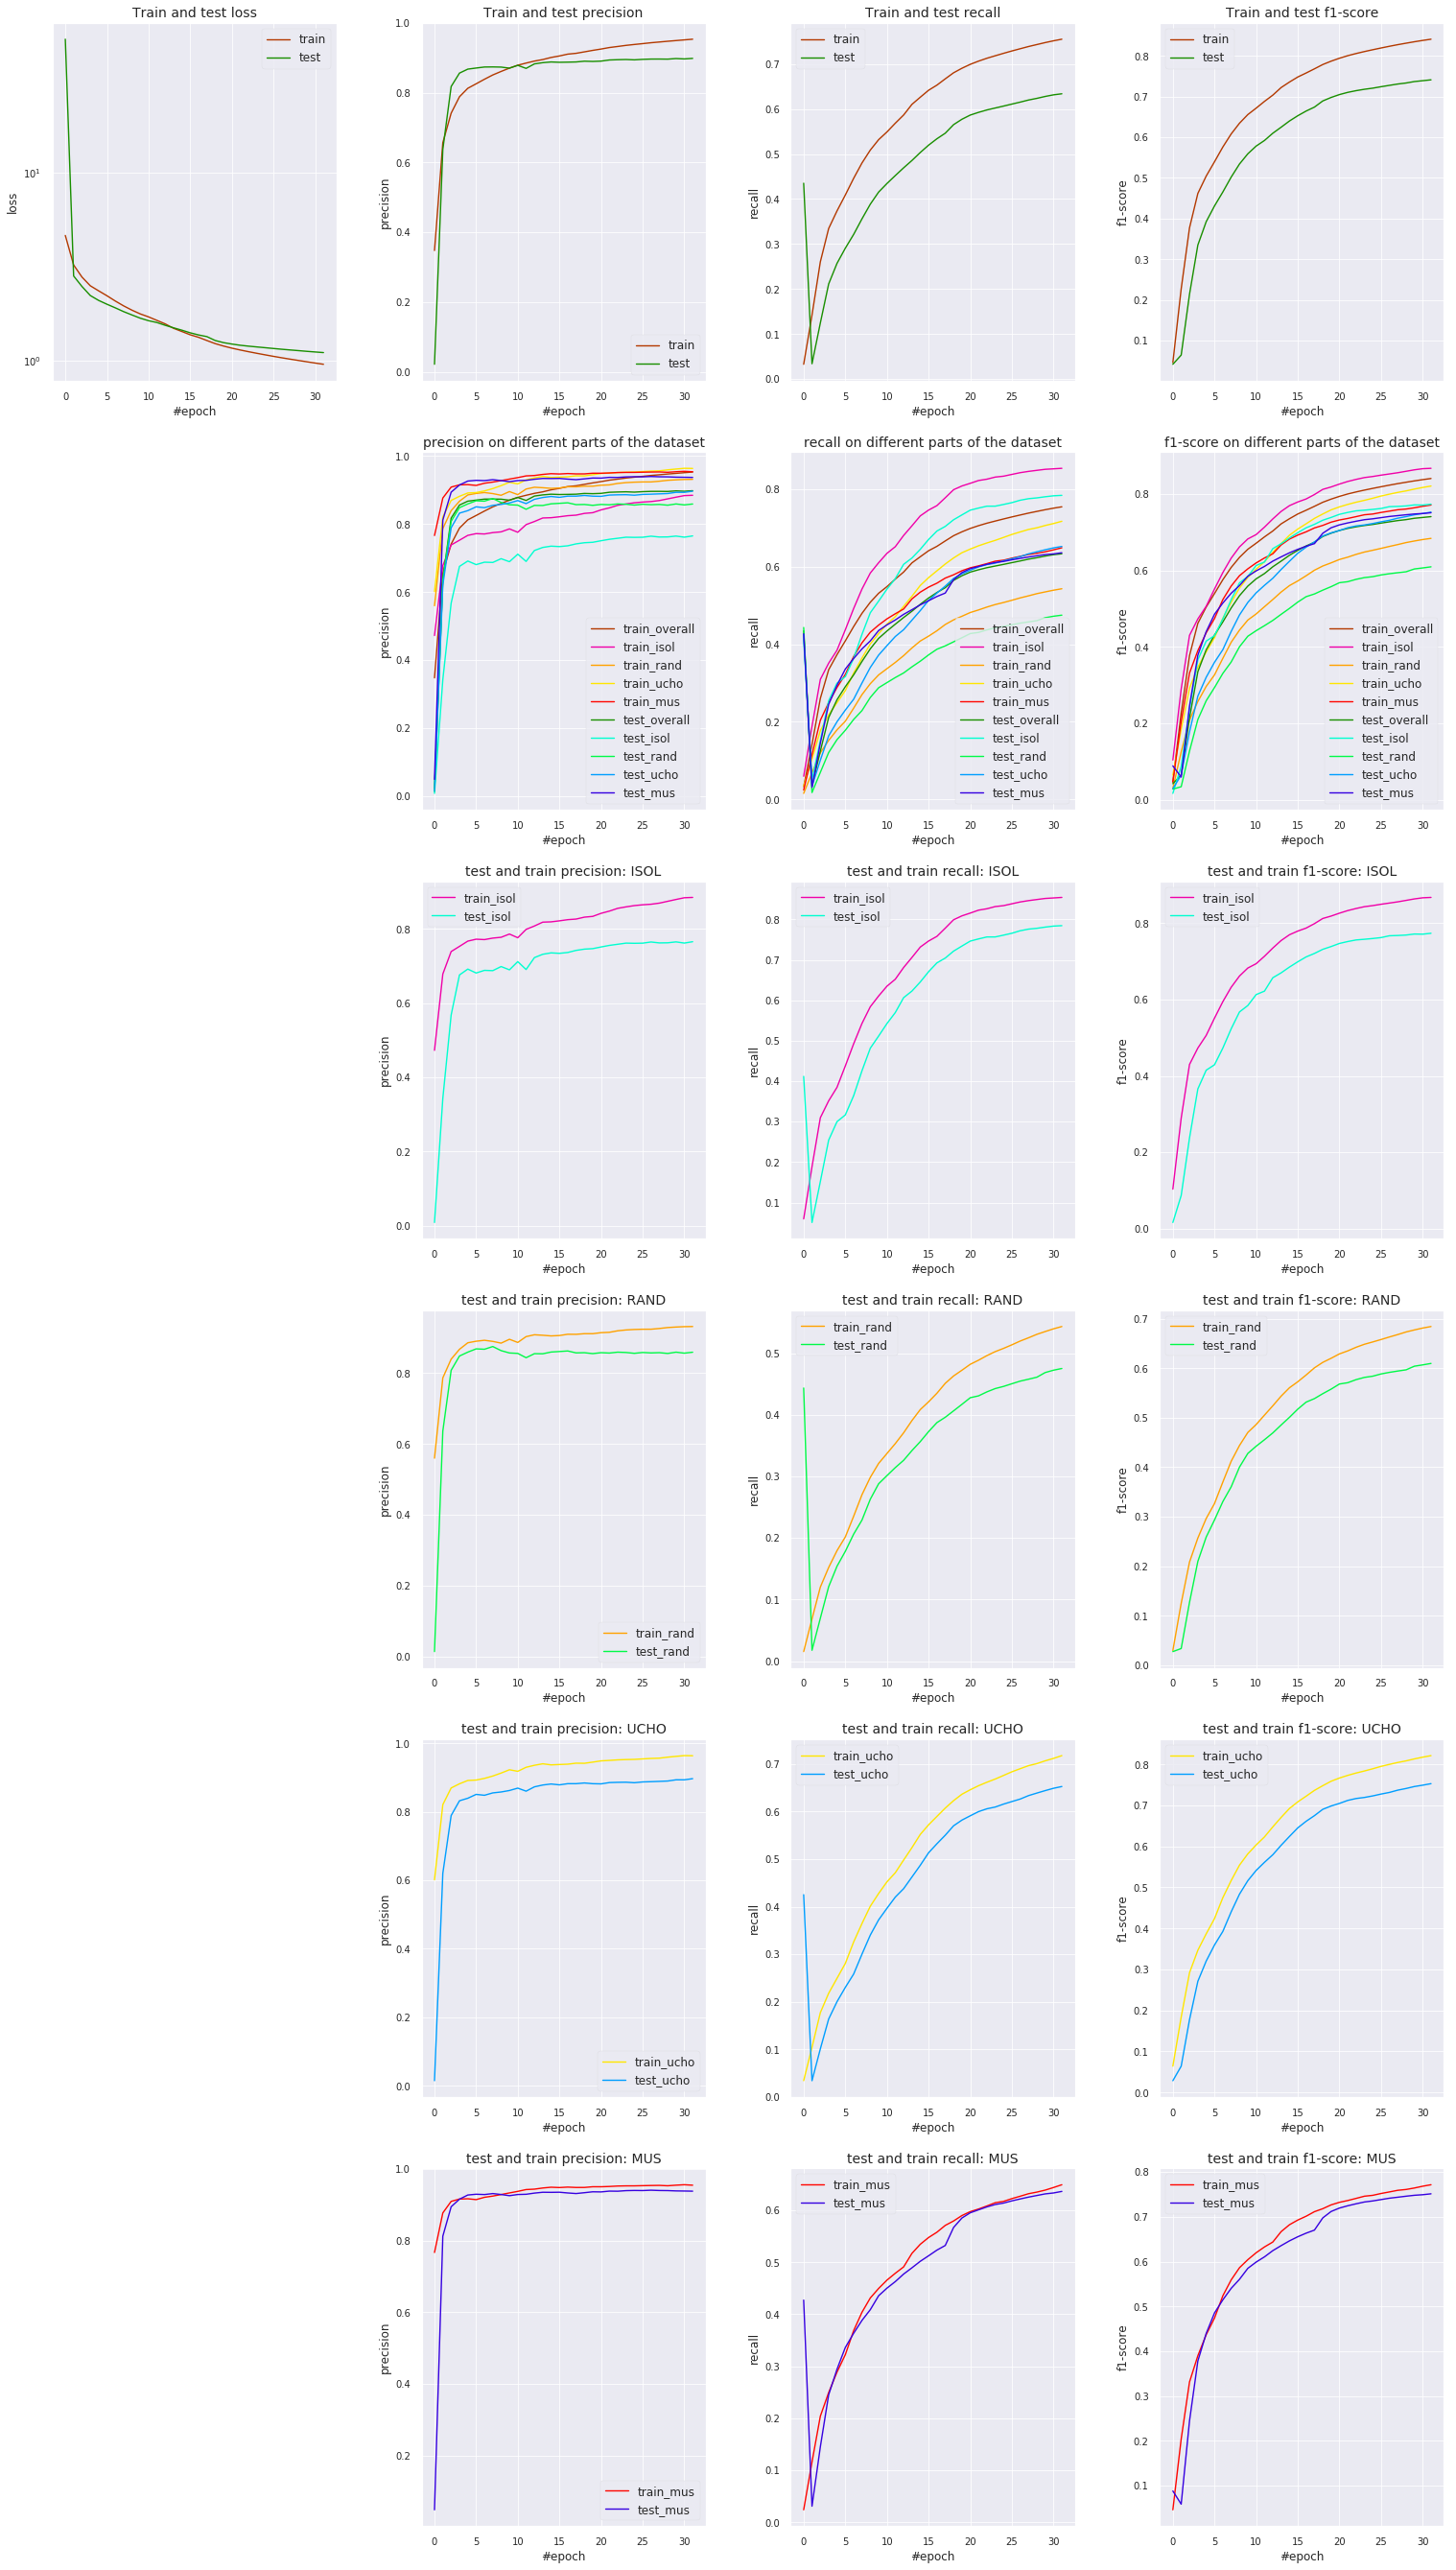

****************
* Current epoch number: 31
****************
* Current train loss: 0.951549
* Current test loss: 1.098247
****************
* Current train precision: 0.953258
* Current test precision: 0.898311
****************
* Current train recall: 0.755069
* Current test recall: 0.633825
****************
* Current train f1-score: 0.841097
* Current test f1-score: 0.741211
****************
* Elapsed time: 0:09:13.367530
****************
Model saved in path: /content/gdrive/My Drive/multipitch_estimation/tmp/model_2019-06-18_11:41.ckpt
The train history have been saved! Current epoch number: 32
Elapsed time: 4:48:22.235961


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [0]:
for i in range(n_epoch):
    elapsed_time = 0.0
    start_epoch_time = time.time()
        
    test_epoch_loss, test_epoch_precision, test_epoch_recall, test_epoch_f1_score = model.get_epoch_test_parameters(X_test, y_test, sess)
    
    test_epoch_isol_loss, test_epoch_isol_precision, test_epoch_isol_recall, test_epoch_isol_f1_score = model.get_epoch_test_parameters(X_test_isol, y_test_isol, sess)
    test_epoch_rand_loss, test_epoch_rand_precision, test_epoch_rand_recall, test_epoch_rand_f1_score = model.get_epoch_test_parameters(X_test_rand, y_test_rand, sess)
    test_epoch_ucho_loss, test_epoch_ucho_precision, test_epoch_ucho_recall, test_epoch_ucho_f1_score = model.get_epoch_test_parameters(X_test_ucho, y_test_ucho, sess)
    test_epoch_mus_loss, test_epoch_mus_precision, test_epoch_mus_recall, test_epoch_mus_f1_score = model.get_epoch_test_parameters(X_test_mus, y_test_mus, sess)
    
    
    train_epoch_loss, train_epoch_precision, train_epoch_recall, train_epoch_f1_score = model.get_epoch_train_parameters(X_train, y_train, sess)
    
    _ , train_epoch_isol_precision, train_epoch_isol_recall, train_epoch_isol_f1_score = model.get_epoch_test_parameters(X_train_isol, y_train_isol, sess)
    _ , train_epoch_rand_precision, train_epoch_rand_recall, train_epoch_rand_f1_score = model.get_epoch_test_parameters(X_train_rand, y_train_rand, sess)
    _ , train_epoch_ucho_precision, train_epoch_ucho_recall, train_epoch_ucho_f1_score = model.get_epoch_test_parameters(X_train_ucho, y_train_ucho, sess)
    _ , train_epoch_mus_precision, train_epoch_mus_recall, train_epoch_mus_f1_score = model.get_epoch_test_parameters(X_train_mus, y_train_mus, sess)
    
    # train
    model.train_loss_history.append(train_epoch_loss)
    model.train_precision_history.append(train_epoch_precision)
    model.train_f1_score_history.append(train_epoch_f1_score)
    model.train_recall_history.append(train_epoch_recall)
    
    model.train_isol_precision_history.append(train_epoch_isol_precision)
    model.train_isol_recall_history.append(train_epoch_isol_recall)
    model.train_isol_f1_score_history.append(train_epoch_isol_f1_score)
    
    model.train_rand_precision_history.append(train_epoch_rand_precision)
    model.train_rand_recall_history.append(train_epoch_rand_recall)
    model.train_rand_f1_score_history.append(train_epoch_rand_f1_score)
    
    model.train_ucho_precision_history.append(train_epoch_ucho_precision)
    model.train_ucho_recall_history.append(train_epoch_ucho_recall)
    model.train_ucho_f1_score_history.append(train_epoch_ucho_f1_score)
    
    model.train_mus_precision_history.append(train_epoch_mus_precision)
    model.train_mus_recall_history.append(train_epoch_mus_recall)
    model.train_mus_f1_score_history.append(train_epoch_mus_f1_score)

    # test
    model.test_loss_history.append(test_epoch_loss)
    model.test_precision_history.append(test_epoch_precision)
    model.test_f1_score_history.append(test_epoch_f1_score)
    model.test_recall_history.append(test_epoch_recall)
    
    model.test_isol_precision_history.append(test_epoch_isol_precision)
    model.test_isol_recall_history.append(test_epoch_isol_recall)
    model.test_isol_f1_score_history.append(test_epoch_isol_f1_score)
    
    model.test_rand_precision_history.append(test_epoch_rand_precision)
    model.test_rand_recall_history.append(test_epoch_rand_recall)
    model.test_rand_f1_score_history.append(test_epoch_rand_f1_score)
    
    model.test_ucho_precision_history.append(test_epoch_ucho_precision)
    model.test_ucho_recall_history.append(test_epoch_ucho_recall)
    model.test_ucho_f1_score_history.append(test_epoch_ucho_f1_score)
    
    model.test_mus_precision_history.append(test_epoch_mus_precision)
    model.test_mus_recall_history.append(test_epoch_mus_recall)
    model.test_mus_f1_score_history.append(test_epoch_mus_f1_score)
    
    clear_output(wait=True)
    model.display_history()
    end_epoch_time = time.time()
    
    print('****************')
    print('* Current epoch number: {}'.format(i))
    print('****************')
    print('* Current train loss: %f' % train_epoch_loss)
    print('* Current test loss: %f' % test_epoch_loss)
    print('****************')
    print('* Current train precision: %f' % train_epoch_precision)
    print('* Current test precision: %f' % test_epoch_precision)
    print('****************')
    print('* Current train recall: %f' % train_epoch_recall)
    print('* Current test recall: %f' % test_epoch_recall)
    print('****************')
    print('* Current train f1-score: %f' % train_epoch_f1_score)
    print('* Current test f1-score: %f' % test_epoch_f1_score)
    print('****************')
    print('* Elapsed time: {}'.format(str(datetime.timedelta(seconds=(end_epoch_time - start_epoch_time)))))
    print('****************')
    elapsed_time += (end_epoch_time - start_epoch_time)
    model.save_history(sess, elapsed_time, 1, lr, batch_size)
    print('Elapsed time: {}'.format(str(datetime.timedelta(seconds=model.overall_train_time))))
    

## Restore model

In [0]:
tf.reset_default_graph()

sess = tf.InteractiveSession()

model = STFT()
model.define_graph(activation=tf.nn.sigmoid)

# присвоить всем переменным их initial_value
sess.run(tf.initialize_all_variables())
sess.run(tf.local_variables_initializer())

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
# Restore variables from disk.
saver.restore(sess, "/content/gdrive/My Drive/multipitch_estimation/tmp/model_2019-05-10_23:25.ckpt")
print("Model restored.")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/music_transcription/tmp/model_2019-05-10_23:25.ckpt
Model restored.


In [0]:
y_pred_test = model.predict(X_test, sess)

In [0]:
precision_score(np.array(y_test).flatten(), np.round(np.array(y_pred_test).flatten()))

0.9013990267639903

In [0]:
recall_score(np.array(y_test).flatten(), np.round(np.array(y_pred_test).flatten()))

0.5797957666575375